# How fast can we generate points on a circle?

In [ ]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}
:opt no-lint

import FMorph
import Diagrams.Prelude

In [65]:
drawCircle = draw . (scalePts 100) 

In [66]:
-- naive:
acircle1 n = map (\t ->
                    (cos (t * tau), sin (t * tau)))
                $ linspace n

-- using circle symmetries:
-- 1/8 as many iterationss, give or take
acircle2 n = concatMap (\t ->
                    let x = cos (t * pi / 4) 
                        y = sin (t * pi / 4)
                    in [(x, y), (y, x), 
                        (-x, y), (y, -x),
                        (x, -y), (-y, x),
                        (-x, -y), (-y, -x)])
                $ linspace n

-- getting rid of one costly 'sin'
acircle3 n = concatMap (\t ->
                    let x = cos (t * pi / 4) 
                        y = sqrt (1 - x ** 2) -- still costly
                    in [(x, y), (y, x), 
                        (-x, y), (y, -x),
                        (x, -y), (-y, x),
                        (-x, -y), (-y, -x)])
                $ linspace n
                
-- to be continued..
acircle4 n = undefined

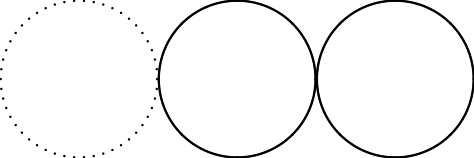

In [67]:
diagram $ ( (drawCircle (acircle1 50)) |||
            (drawCircle (acircle2 50)) |||
            (drawCircle (acircle3 50)) )